# <center>Bad Banking Behavior<br>Analyzing Bank Mortgage during the 2008 Housing Bubble</center>  

<center>Michael Siebel</center>
<center>December 2020</center>

<br>
    
## <center>Data Mining Script</center>
<br>

# Objectives  
<br>

>Below contains information on five features: credit score, debt-to-income ratio, loan-to-value ratio, median household income at the 3-digit zip code-level, and the dollar amount change in mortgage loans made 1 year ago and 5 years ago. The latter feature was created by taking total loan amount during a fiscal year quarter for each bank within a 3-digit zip code.
<br><br>
Graphs and tables are made for foreclosures and the five features analyzed.  This includes creating graphs for model predictions.  Included in the graph data visualizations are GIFs of foreclosures changing over time.

## Table of Contents
- [Load Functions](#Load-Functions)<br>
- [Foreclosure Descriptive Statistics](#Foreclosure-Descriptive-Statistics)<br>
- [Bank Descriptive Statistics](#Bank-Descriptive-Statistics)<br>
- [Features Likely to Define Foreclosures](#Features-Likely-to-Define-Foreclosures)

***

# Load Functions

In [1]:
# Load functions
%run Functions.ipynb
pd.set_option("display.max_columns", 200)
pd.set_option('display.max_rows', 200)

# Load data
file_to_open = open('..\Data\Pickle\df.pkl', 'rb') 
df = pickle.load(file_to_open) 
file_to_open.close()

file_to_open = open('..\Data\Pickle\df_load.pkl', 'rb') 
df_load = pickle.load(file_to_open) 
file_to_open.close()

# Convert Inf values to NA
df = df.replace([np.inf, -np.inf], np.nan)
df_load = df_load.replace([np.inf, -np.inf], np.nan)

# Set up plots
jtplot.style(ticks=True, grid=False)
import plotly.io as pio
from IPython.display import HTML
from PIL import Image

Using TensorFlow backend.


In [2]:
# Rename Columns
df = df.rename(columns={"Original Combined Loan-to-Value (CLTV)": "Loan-to-Value (LTV)", 
                        "Original Debt to Income Ratio": "Debt-to-Income",
                        "Loan Change (1 Year)": "Loan Change (1 Yr)",
                        "Loan Change (5 Years)": "Loan Change (5 Yr)",
                        "Lnlsnet (1 Yr)": "Loan Liabilities (1 Yr)",
                        "Lnlsnet (5 Yr)": "Loan Liabilities (5 Yr)"})
df_load = df_load.rename(columns={"Original Combined Loan-to-Value (CLTV)": "Loan-to-Value (LTV)", 
                                  "Original Debt to Income Ratio": "Debt-to-Income"})

***

# Foreclosure Descriptive Statistics

In [3]:
print('Year 2006')
print(df_load.loc[df_load['File Year']==2006, 'Bank'].value_counts())
print('\n')

print('Year 2007')
print(df_load.loc[df_load['File Year']==2007, 'Bank'].value_counts())
print('\n')

print('Year 2008')
print(df_load.loc[df_load['File Year']==2008, 'Bank'].value_counts())

Year 2006
Other                287476
Bank of America      251165
CitiMortgage         113565
GMAC Mortgage         93320
Wells Fargo Bank      92274
JPMorgan Chase        79629
SunTrust Mortgage     76612
AmTrust Bank          38316
PNC Bank              30866
Flagstar Bank         28579
Name: Bank, dtype: int64


Year 2007
Bank of America      371423
Other                260048
CitiMortgage         135536
JPMorgan Chase       103880
Wells Fargo Bank     101136
GMAC Mortgage         78857
PNC Bank              63726
SunTrust Mortgage     53548
AmTrust Bank          38024
Flagstar Bank         34789
Name: Bank, dtype: int64


Year 2008
Other                337698
Bank of America      270596
JPMorgan Chase       238777
Wells Fargo Bank     205056
CitiMortgage         152215
SunTrust Mortgage     84621
GMAC Mortgage         73129
AmTrust Bank          62618
Flagstar Bank         51651
PNC Bank              38276
Name: Bank, dtype: int64


**Other** is a major catogory

In [4]:
print('Year 2006')
display(Overall_Data(df = df_load, subset = "df_load['File Year']==2006").iloc[:,:2])
print('\n')

print('Year 2007')
display(Overall_Data(df = df_load, subset = "df_load['File Year']==2007").iloc[:,:2])
print('\n')

print('Year 2008')
display(Overall_Data(df = df_load, subset = "df_load['File Year']==2008").iloc[:,:2])
print('\n')

print('All Years')
display(Overall_Data(df = df_load, subset = "df_load['File Year']>=2006").iloc[:,:2])
print('\n')

print('Isolating Other Loans (All Years)')
subset = "(df_load['File Year']>=2006) & (df_load['Bank']=='Other')"
display(Overall_Data(df = df_load, subset = subset).iloc[:,:2])

Year 2006


,Foreclosed (%),Foreclosed (N)
Foreclosed,,
Did not Foreclose,91.8,1002539
Foreclosed,8.2,89263




Year 2007


,Foreclosed (%),Foreclosed (N)
Foreclosed,,
Did not Foreclose,90.6,1124043
Foreclosed,9.4,116924




Year 2008


,Foreclosed (%),Foreclosed (N)
Foreclosed,,
Did not Foreclose,94.2,1426122
Foreclosed,5.8,88515




All Years


,Foreclosed (%),Foreclosed (N)
Foreclosed,,
Did not Foreclose,92.3,3552704
Foreclosed,7.7,294702




Isolating Other Loans (All Years)


,Foreclosed (%),Foreclosed (N)
Foreclosed,,
Did not Foreclose,94.1,832724
Foreclosed,5.9,52498


**Other**, smaller, banks constitute much fewer foreclosures (**5.9%**) compared to the big banks.  Removing them from the dataset should increase the proportion of foreclosures.

In [5]:
# Drop unused variables
# Variables to drop
dropvars = ['Year', 'Month', 'Region', 'Zero Balance Code', 
            'Mortgage Insurance Type', 
            'First Payment', 'Original Loan-to-Value (LTV)']
df = df.drop(labels=dropvars, axis=1)
df = df.filter(regex=r'^(?!Asset).*$')
df = df.filter(regex=r'^(?!Liab).*$')
df = df.filter(regex=r'^(?!Eqtot).*$')
df = df.filter(regex=r'^(?!Dep).*$')
df = df.dropna()

# Variables to drop
dropvars = ['Year', 'Month', 'Zero Balance Code', 
            'Mortgage Insurance Type', 
            'First Payment', 'Original Loan-to-Value (LTV)']
df_load = df_load.drop(labels=dropvars, axis=1)
df_load = df_load.dropna()

# Drop other banks
df_load = df_load.loc[df_load['Bank'] != 'Other',:]

# Drop missings in main data
df_new = df_load.loc[df_load['File Year']>=2006,:]
df_old = df_load.loc[df_load['File Year']<2006,:]
subset = df_new.loc[:,'Loan ID'].isin(df.loc[:,'Loan ID'])
df_sub = df_new.loc[subset,:]
df_load = pd.concat([df_old, df_sub], axis=0)

In [6]:
print('Year 2006')
display(Overall_Data(df = df, subset = "df['File Year']==2006").iloc[:,:2])
print('\n')

print('Year 2007')
display(Overall_Data(df = df, subset = "df['File Year']==2007").iloc[:,:2])
print('\n')

print('Year 2008')
display(Overall_Data(df = df, subset = "df['File Year']==2008").iloc[:,:2])
print('\n')

print('All Years')
display(Overall_Data(df = df, subset = "df['File Year']>=2006").iloc[:,:2])

Year 2006


,Foreclosed (%),Foreclosed (N)
Foreclosed,,
Did not Foreclose,91.0,594212
Foreclosed,9.0,59043




Year 2007


,Foreclosed (%),Foreclosed (N)
Foreclosed,,
Did not Foreclose,89.8,768752
Foreclosed,10.2,87619




Year 2008


,Foreclosed (%),Foreclosed (N)
Foreclosed,,
Did not Foreclose,89.9,91933
Foreclosed,10.1,10322




All Years


,Foreclosed (%),Foreclosed (N)
Foreclosed,,
Did not Foreclose,90.3,1454897
Foreclosed,9.7,156984


Removing **Other**, smaller, banks increased foreclosures from **7.7%** to **9.7%**.

In [7]:
# Quarter Version
YrQtr = {}
Qtr = ('Q1', 'Q2', 'Q3', 'Q4')
Yr = range(2006,2009)
i = 0
for yr in Yr:
    for qtr in Qtr:
        YrQtr[i] = str(str(yr) + qtr)
        i += 1
        
# Short Version
YrShort = {}
Yr = range(2006,2009)
i = 0
for yr in Yr:
    YrShort[i] = str(yr)
    i += 1
       
# Long Version
df_YrLong = {}
YrLong = {}
Yr = range(2001,2009)
i = 0
for yr in Yr:
    YrLong[i] = int(yr)
    i += 1
        
print('Number in quarter time series', len(YrQtr))
print('Number in short time series', len(YrShort))
print('Number in long time series', len(YrLong))

Number in quarter time series 12
Number in short time series 3
Number in long time series 8


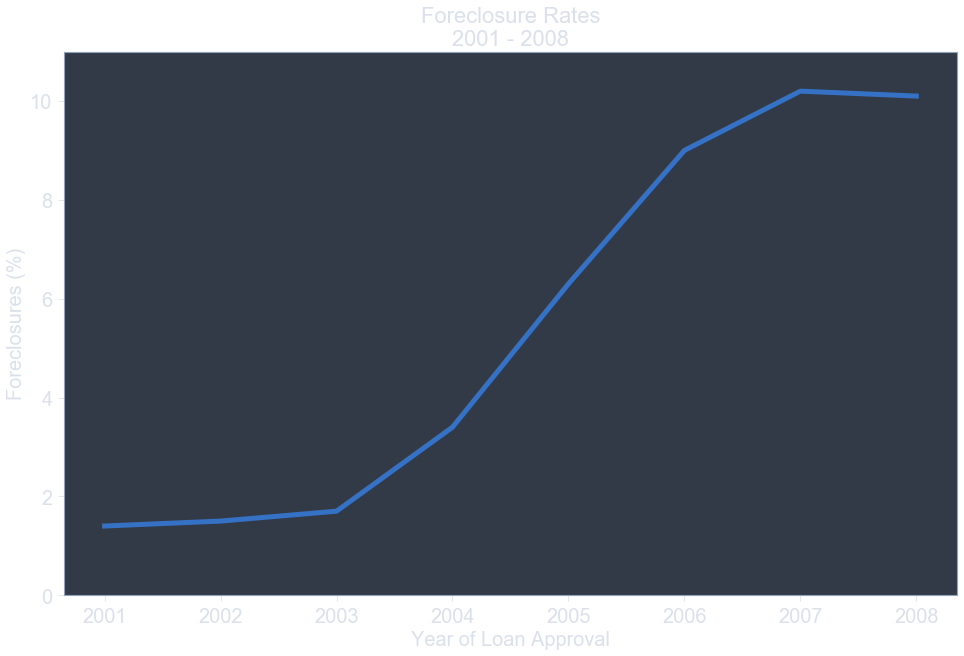

In [8]:
# Foreclosures by year
plot_yr = {}
plot_df = pd.DataFrame(index=['Foreclosed (%)'], columns=YrLong.values())

for j in range(len(YrLong)):
    plot_yr[j] = Overall_Data(YrQtr = YrLong[j], df = df_load).iloc[1,0]
    plot_df.iloc[:,j] = plot_yr[j]

fig, ax = plt.subplots(1, 1, figsize=(16,10))

plt.plot(plot_df.columns, plot_df.iloc[0,:], linewidth=5, alpha=1)


ax.set_title('Foreclosure Rates\n2001 - 2008', fontsize=22)
ax.axis(ymin=0, ymax=11)
ax.set_ylabel('Foreclosures (%)', fontsize=20)
ax.set_xlabel('Year of Loan Approval', fontsize=20)
ax.tick_params(axis='both', labelsize=20)

plt.show()

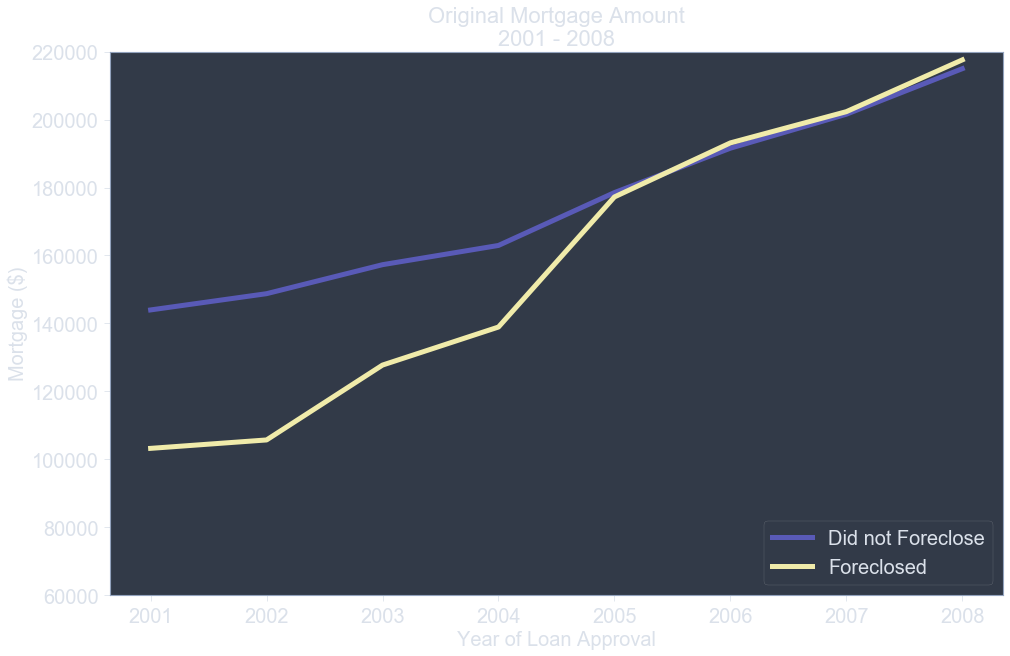

In [9]:
# Original Mortgage amount by foreclosure by year
plot_yr0 = {}
plot_yr1 = {}
plot_df = pd.DataFrame(index=['Did not Foreclose', 'Foreclosed'], columns=YrLong.values())

for j in range(len(YrLong)):
    plot_yr1[j] = Overall_Data(YrQtr = YrLong[j], df = df_load, fmaevars=True).loc['Foreclosed','Original Mortgage Amount']
    plot_df.iloc[1,j] = plot_yr1[j]
    plot_yr0[j] = Overall_Data(YrQtr = YrLong[j], df = df_load, fmaevars=True).loc['Did not Foreclose','Original Mortgage Amount']
    plot_df.iloc[0,j] = plot_yr0[j]
    
fig, ax = plt.subplots(1, 1, figsize=(16,10))

plt.plot(plot_df.columns, plot_df.iloc[0,:], linewidth=5, alpha=1, color='#595AB7')
plt.plot(plot_df.columns, plot_df.iloc[1,:], linewidth=5, alpha=1, color='#f0ebaa')


ax.set_title('Original Mortgage Amount\n2001 - 2008', fontsize=22)
ax.set_ylabel('Mortgage ($)', fontsize=20)
ax.set_xlabel('Year of Loan Approval', fontsize=20)
ax.axis(ymin=60000, ymax=220000)
ax.tick_params(axis='both', labelsize=20)
ax.legend(plot_df.T.columns, loc='lower right', fontsize=20)

plt.show()

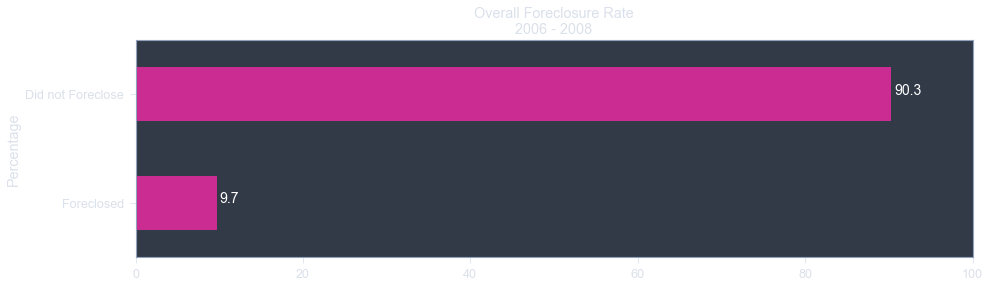

In [10]:
# Foreclosures
Foreclosed = Overall_Data(df = df)

# Graphing target variable
fig = plt.figure(figsize=(15,4))
bars = Foreclosed.loc[:, 'Foreclosed (%)']
bars.plot.barh(color='#ca2c92').invert_yaxis()

plt.title(str('Overall Foreclosure Rate\n2006 - 2008'))

# Labels
ls = bars.values
xs = bars.values
ys = np.array([0, 1])
for x,y,l in zip(xs,ys,ls):
    label = "{:.1f}".format(l)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(3,0), # distance from text to points (x,y)
                 color='white',
                 fontsize=14,
                 ha='left') # horizontal alignment can be left, right or center

plt.ylabel('Percentage')
plt.xlim([0,100])

plt.show()

In [11]:
gif_frames = list()
for i in range(len(YrQtr)):
    
    # Foreclosures
    Foreclosed = Overall_Data(YrQtr = YrQtr[i], df = df)
    
    # Graphing target variable
    fig = plt.figure(figsize=(15,4))
    bars = Foreclosed.loc[:, 'Foreclosed (%)']
    bars.plot.barh(color='#ca2c92').invert_yaxis()
    plt.title(str('Foreclosures for ' + YrQtr[i]), fontsize=22)
    
    # Labels
    ls = bars.values
    xs = bars.values
    ys = np.array([0, 1])
    for x,y,l in zip(xs,ys,ls):
        label = "{:.1f}".format(l)
        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(3,0), # distance from text to points (x,y)
                     color='white',
                     ha='left') # horizontal alignment can be left, right or center

    plt.ylabel('Percentage', fontsize=20)
    ax.tick_params(axis='both', labelsize=20)
    plt.xlim([0,100])
    
    plt.savefig(str("GIF_Frames/Foreclosures_" + str(i) + ".png"), transparent=False)
    plt.close(fig)
    gif = Image.open(str("GIF_Frames/Foreclosures_" + str(i) + ".png"))
    gif_frames.append(gif)

# Save GIF
gif_frames[0].save('GIF_Frames/Foreclosures.gif', format='GIF', save_all=True, 
                   append_images=gif_frames[1:], optimize=True, duration=900, loop=0)
# Display GIF
HTML('<img src="GIF_Frames/Foreclosures.gif">')

### Geographical Representation of Foreclosures

State Foreclosures

In [12]:
fig = {}
frames = list()
gif_frames = list()

for i in range(len(YrLong)):
    # Foreclosures
    State_Foreclosures = df_load.loc[df_load['File Year']==YrLong[i],:] \
                         .groupby(['Property State']).agg({'Foreclosed': 'mean'})*100
    State_Foreclosures = State_Foreclosures.round(1)
    
    # Graph
    fig[i] = go.Figure(data=go.Choropleth(
        locations=State_Foreclosures.index, # Spatial coordinates
        z = State_Foreclosures['Foreclosed'].astype(float), # Data to be color-coded
        zmin = 0,
        zmax = 30,
        locationmode = 'USA-states', # set of locations match entries in `locations`
        colorscale = px.colors.sequential.Purples[3:],
        marker_line_color=px.colors.sequential.Purples[3],
        colorbar_title = "Forclosures (%)"
    ))
    
    fig[i].update_layout(
        title_text = str("Forclosures by State, " + str(YrLong[i])),
        geo_scope='usa', # limite map scope to USA
        margin={"r":0,"l":0,"b":0}
    )
    
    pio.write_image(fig[i], str("GIF_Frames/State_Foreclosures_" + str(YrLong[i]) + ".png"))
    gif = Image.open(str("GIF_Frames/State_Foreclosures_" + str(YrLong[i]) + ".png"))
    gif_frames.append(gif)

# Save GIF
gif_frames[0].save('GIF_Frames/State_Foreclosures.gif', format='GIF', save_all=True, 
                   append_images=gif_frames[1:], optimize=True, duration=900, loop=0)
# Display GIF
HTML('<img src="GIF_Frames/State_Foreclosures.gif">')

Foreclosures by Zip Code

In [13]:
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)
    
# Import county zipcode crosswalk
crosswalk = pd.read_csv("..\Data\ZIP-COUNTY-FIPS_2017-06.csv",
                        header = 0)
crosswalk = crosswalk.rename(columns={'ZIP': 'Zip Code', 'COUNTYNAME': 'County', 'STCOUNTYFP': 'FIPS'})
crosswalk = crosswalk.loc[:, ['Zip Code', 'County', 'FIPS']]
crosswalk['Zip 5'] = crosswalk['Zip Code']
crosswalk['Zip Code'] = crosswalk['Zip Code'].astype(str)
crosswalk['Zip Code'] = crosswalk['Zip Code'].str.slice(start=0, stop=-2)
crosswalk['Zip Code'] = crosswalk['Zip Code'].str.ljust(3, '0')
crosswalk['FIPS'] = crosswalk['FIPS'].astype(str)
crosswalk['FIPS'] = crosswalk['FIPS'].str.rjust(5, '0')

In [14]:
fig = {}
frames = list()
gif_frames = list()

for i in range(len(YrLong)):
    # Foreclosures
    FIPS_Foreclosures = df_load.loc[df_load['File Year']==YrLong[i],:] \
                        .groupby(['Zip Code']).agg({'Foreclosed': 'mean'})*100
    FIPS_Foreclosures = FIPS_Foreclosures.round(1)
    FIPS_Foreclosures = FIPS_Foreclosures.reset_index()
    FIPS_Foreclosures['Zip Code'] = FIPS_Foreclosures['Zip Code'].astype(int).astype(str)
    FIPS_Foreclosures['Zip Code'] = FIPS_Foreclosures['Zip Code'].str.ljust(3, '0')
    
    # Merge
    FIPS_Foreclosures = pd.merge(FIPS_Foreclosures, crosswalk, on='Zip Code', how='inner')
    
    # Remove Outliers
    FIPS_Foreclosures = FIPS_Foreclosures.loc[FIPS_Foreclosures['Foreclosed']!=100, :]
    FIPS_Foreclosures = FIPS_Foreclosures.loc[FIPS_Foreclosures['Foreclosed']!=50, :]
    
    # Graph
    fig[i] = go.Figure(data=go.Choropleth(
        locations = FIPS_Foreclosures['FIPS'], # Spatial coordinates
        z = FIPS_Foreclosures['Foreclosed'].astype(float), # Data to be color-coded
        zmin = 0,
        zmax = 30,
        locationmode = 'geojson-id', # set of locations match entries in `locations`
        geojson = counties,
        colorscale = px.colors.sequential.Blues[3:],
        marker_line_color=px.colors.sequential.Blues[3], 
        colorbar_title = "Forclosures (%)"
    ))
    
    fig[i].update_layout(
        title_text = str("Forclosures by Zip Code, " + str(YrLong[i])),
        geo_scope='usa', # limite map scope to USA
        margin={"r":0,"l":0,"b":0}
    )
    
    pio.write_image(fig[i], str("GIF_Frames/Zip_Foreclosures_" + str(YrLong[i]) + ".png"))
    gif = Image.open(str("GIF_Frames/Zip_Foreclosures_" + str(YrLong[i]) + ".png"))
    gif_frames.append(gif)

# Save GIF
gif_frames[0].save('GIF_Frames/Zip_Foreclosures.gif', format='GIF', save_all=True, 
                   append_images=gif_frames[1:], optimize=True, duration=900, loop=0)
# Display GIF
HTML('<img src="GIF_Frames/Zip_Foreclosures.gif">')

***

# Bank Descriptive Statistics

In [15]:
# Bank represented
Banks = Bank_Data(df = df)
Banks

,Bank (%),Bank (N),Foreclosed (%)
Bank,,,
AmTrust Bank,1.5,23379,9.3
Bank of America,39.4,634572,11.6
CitiMortgage,15.2,245181,7.7
Flagstar Bank,3.9,63255,11.7
GMAC Mortgage,10.5,168946,9.7
JPMorgan Chase,11.9,191480,7.6
PNC Bank,1.0,15570,8.8
SunTrust Mortgage,4.4,70591,10.3
Wells Fargo Bank,12.3,198907,7.6


In [16]:
# Feautures per Bank
Banks = Bank_Data(df = df, allvars = True)
Banks

,Bank (%),Bank (N),Foreclosed (%),Original Mortgage Amount,Credit Score,Debt-to-Income,First Time Home Buyer (%),Refinanced,Interest Rate,Loan Term,Loan-to-Value (LTV),Single Borrower Ratio,Mortgage Insurance %,Median Household Income,Loan Change (1 Yr),Loan Change (5 Yr),Loan Liabilities (1 Yr),Loan Liabilities (5 Yr)
Bank,,,,,,,,,,,,,,,,,,
AmTrust Bank,1.5,23379,9.3,187849.27,723,38.7,12.2,58.6,6.38,336,74.6,0.48,4.76,47708.53,7234.06,34663.51,8.83,0.00
Bank of America,39.4,634572,11.6,186119.96,714,38.4,8.6,67.2,6.44,335,72.3,0.50,4.22,48567.87,12967.53,52684.29,1.08,170.40
CitiMortgage,15.2,245181,7.7,212442.28,724,35.3,14.0,59.8,6.29,327,70.7,0.44,2.81,49490.66,17006.76,67493.36,0.78,0.84
Flagstar Bank,3.9,63255,11.7,176869.46,717,40.9,11.5,59.0,6.48,341,73.4,0.50,4.55,47920.06,11761.54,39533.37,0.04,0.59
GMAC Mortgage,10.5,168946,9.7,198503.89,710,39.9,5.5,71.2,6.41,343,69.8,0.47,1.93,49289.08,17232.85,65352.23,36.94,1.52
JPMorgan Chase,11.9,191480,7.6,201338.37,727,37.1,8.8,58.3,6.33,324,72.0,0.46,3.09,48397.43,19296.47,63666.73,2.03,30.88
PNC Bank,1.0,15570,8.8,187503.47,728,38.5,11.2,64.7,6.24,337,73.9,0.46,3.85,47951.92,5880.24,50746.67,-0.28,-0.55
SunTrust Mortgage,4.4,70591,10.3,180122.83,724,38.6,6.8,62.4,6.24,329,72.6,0.44,3.18,47263.55,13497.83,50797.33,3763.91,3101.76
Wells Fargo Bank,12.3,198907,7.6,233393.39,726,39.0,11.7,56.0,6.26,335,73.9,0.40,3.51,49196.66,18325.46,96423.40,2.77,836.63


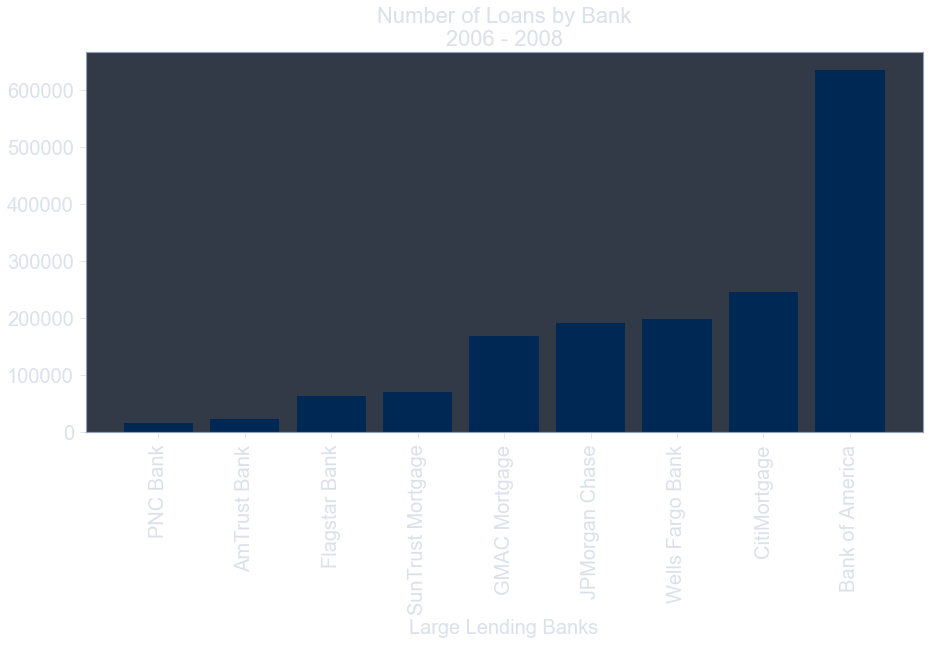

In [17]:
bnk_size = Banks[['Bank (N)']].sort_values(by=['Bank (N)'])
fig, ax = plt.subplots(1, 1, figsize=(15,7))

plt.bar(bnk_size.index, bnk_size.loc[:,'Bank (N)'], color = '#002855')
plt.xticks(rotation=90)
ax.tick_params(axis='both', labelsize=20)
plt.title('Number of Loans by Bank\n2006 - 2008', fontsize=22)
plt.xlabel('Large Lending Banks', fontsize=20)

plt.show()

### Foreclosures

In [18]:
# Worst actor
worst_actor = pd.DataFrame()
for i in range(len(YrShort)):
    print(YrShort[i])
    Banks_short = Bank_Data(YrQtr = YrShort[i], df = df_load, rounding = 5)
    tbl = search_Banks('Foreclosed (%)', df = Banks_short, func = max)
    tbl['Foreclosed (%)'] = tbl['Foreclosed (%)'].round(1)
    display(tbl)
    tbl = tbl.reset_index()
    tbl.index = [YrShort[i]]
    worst_actor = pd.concat([worst_actor, tbl], axis = 0)
    print('')

print('Overall')
Banks_short = Bank_Data(df = df_load.loc[df_load['File Year']>=2006,:], rounding = 5)
tbl = search_Banks('Foreclosed (%)', df = Banks_short, func = max)
tbl['Foreclosed (%)'] = tbl['Foreclosed (%)'].round(1)
display(tbl)
tbl = tbl.reset_index()
tbl.index = ['Overall']
worst_actor = pd.concat([worst_actor, tbl], axis = 0)

2006


,Foreclosed (%)
Bank,
Flagstar Bank,11.6



2007


,Foreclosed (%)
Bank,
Bank of America,12.0



2008


,Foreclosed (%)
Bank,
SunTrust Mortgage,13.3



Overall


,Foreclosed (%)
Bank,
Flagstar Bank,11.7


In [19]:
# Best actor
best_actor = pd.DataFrame()
for i in range(len(YrShort)):
    print(YrShort[i])
    Banks_short = Bank_Data(YrQtr = YrShort[i], df = df_load, rounding = 5)
    tbl = search_Banks('Foreclosed (%)', df = Banks_short, func = min)
    tbl['Foreclosed (%)'] = tbl['Foreclosed (%)'].round(1)
    display(tbl)
    tbl = tbl.reset_index()
    tbl.index = [YrShort[i]]
    best_actor = pd.concat([best_actor, tbl], axis = 0)
    print('')

print('Overall')
Banks_short = Bank_Data(df = df_load.loc[df_load['File Year']>=2006,:], rounding = 5)
tbl = search_Banks('Foreclosed (%)', df = Banks_short, func = min)
tbl['Foreclosed (%)'] = tbl['Foreclosed (%)'].round(1)
display(tbl)
tbl = tbl.reset_index()
tbl.index = ['Overall']
best_actor = pd.concat([best_actor, tbl], axis = 0)

2006


,Foreclosed (%)
Bank,
Wells Fargo Bank,7.0



2007


,Foreclosed (%)
Bank,
JPMorgan Chase,7.7



2008


,Foreclosed (%)
Bank,
CitiMortgage,7.6



Overall


,Foreclosed (%)
Bank,
Wells Fargo Bank,7.6


In [20]:
worst_best_tbl = pd.concat([worst_actor, best_actor], axis=1)
header = [np.array(['Worst Actors','Worst Actors','Best Actors','Best Actors']), 
          np.array(worst_best_tbl.columns)] 
pd.DataFrame(worst_best_tbl.values, index = worst_best_tbl.index, columns = header )   

Worst Actors                      Best Actors               
                      Bank Foreclosed (%)              Bank Foreclosed (%)
2006         Flagstar Bank           11.6  Wells Fargo Bank              7
2007       Bank of America             12    JPMorgan Chase            7.7
2008     SunTrust Mortgage           13.3      CitiMortgage            7.6
Overall      Flagstar Bank           11.7  Wells Fargo Bank            7.6

***

# Foreclosures per Bank

In [22]:
plt.close()
gif_frames = []
plot_yr = {}
plot_df = pd.DataFrame(index=Banks.index, columns=YrLong.values())

# Foreclosure by bank line chart
for j in range(len(YrLong)):
    plot_yr[j] = pd.DataFrame(Bank_Data(YrQtr = YrLong[j], df = df_load).loc[:, 'Foreclosed (%)'])
    plot_yr[j][plot_yr[j]==0] = np.nan
    plot_yr[j] = plot_yr[j].rename(columns={'Foreclosed (%)': YrLong[j]})
    plot_df.loc[:,YrLong[j]] = plot_yr[j].loc[:,YrLong[j]]

# Interpolate missing years
for j in range(plot_df.shape[1]):
    plot_df.T.iloc[:,j] = plot_df.T.iloc[:,j].astype(float).interpolate(method='linear')
    
plot_dfs = pd.DataFrame(index=Banks.index, columns=YrLong.values()).T
plt.rcParams['figure.figsize']=(16,10)
for j in range(len(plot_dfs.columns)):
    for i in range(len(plot_dfs.index)):
        plot_dfs.iloc[:i+1,j] = plot_df.T.iloc[:i+1,j]
        fig, ax = plt.subplots()
        ax.plot(plot_dfs.index, plot_dfs, linewidth=5, alpha=1)
        plt.gca().set_prop_cycle(None)
        ax.plot(plot_df.T.index, plot_df.T, linewidth=2, alpha=0.33)

        ax.set_title('Bank Foreclosure Rates\n' + plot_dfs.columns[j] + ' ' + str(YrLong[i]), fontsize=22)
        plt.axis(ymin=0, ymax=14)
        ax.tick_params(axis='both', labelsize=20)
        ax.set_ylabel('Foreclosures (%)', fontsize=20)
        ax.set_xlabel('Year of Loan Approval', fontsize=20)
        ax.legend(plot_df.T.columns, loc='lower right', fontsize=16)
        
        plt.savefig(str("GIF_Frames/Bank_Foreclosures_Yr_" + plot_dfs.columns[j] + '_' + str(YrLong[i]) + ".png"), transparent=False)
        plt.close(fig)
        gif = Image.open(str("GIF_Frames/Bank_Foreclosures_Yr_" + plot_dfs.columns[j] + '_' + str(YrLong[i]) + ".png"))
        gif_frames.append(gif)
        
# Save GIF
gif_frames[0].save('GIF_Frames/Bank_Foreclosures_Yr.gif', format='GIF', save_all=True, 
                   append_images=gif_frames[1:], optimize=True, duration=200, loop=0)
# Display GIF
HTML('<img src="GIF_Frames/Bank_Foreclosures_Yr.gif">')       

***

# Features Likely to Define Foreclosures

In [23]:
# Load predicted probabilities
## Improved assumptions
improved = pickle.load(open("..\Data\Pickle\pred_votes_improved.pkl", "rb"))[0]
improved_values = pickle.load(open("..\Data\Pickle\pred_votes_improved.pkl", "rb"))[1]
best = pickle.load(open("..\Data\Pickle\pred_votes_improved.pkl", "rb"))[2]
best_values = pickle.load(open("..\Data\Pickle\pred_votes_improved.pkl", "rb"))[3]

## Weakened assumptions
weakened = pickle.load(open("..\Data\Pickle\pred_votes_weakened.pkl", "rb"))[0]
weakened_values = pickle.load(open("..\Data\Pickle\pred_votes_weakened.pkl", "rb"))[1]
worst = pickle.load(open("..\Data\Pickle\pred_votes_weakened.pkl", "rb"))[2]
worst_values = pickle.load(open("..\Data\Pickle\pred_votes_weakened.pkl", "rb"))[3]

# Credit Score

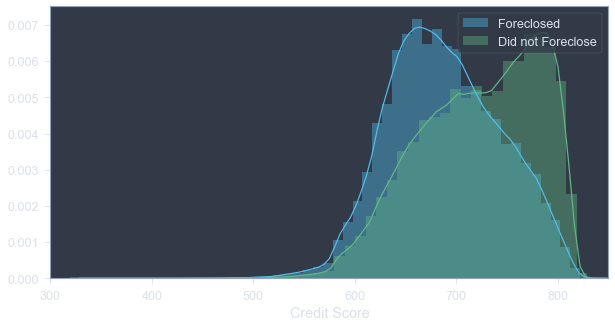

                   Credit Score
Foreclosed                     
Did not Foreclose           722
Foreclosed                  688


In [24]:
feature_density('Credit Score', bins=None, l_xlim=300, r_xlim=850)

,Credit Score
All Banks,719
GMAC Mortgage,710
Bank of America,714
Flagstar Bank,717
AmTrust Bank,723
CitiMortgage,724
SunTrust Mortgage,724
Wells Fargo Bank,726
JPMorgan Chase,727
PNC Bank,728


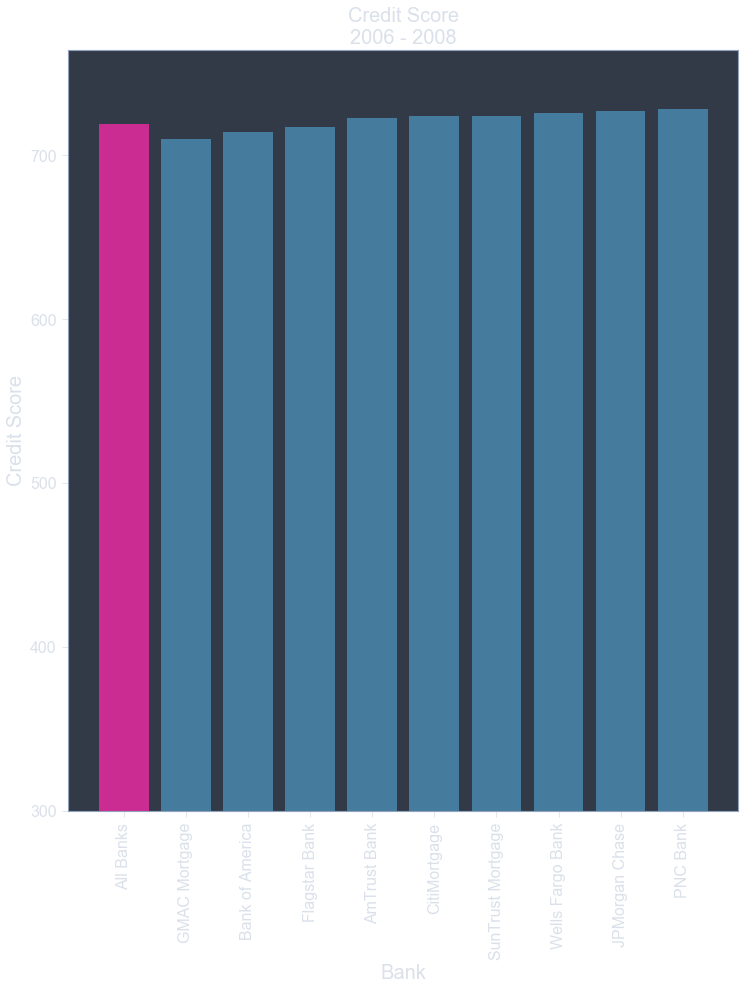

In [25]:
credit_score = Bank_Data(df = df, allvars = True)[['Credit Score']]
bank_rank_gph('Credit Score', df, credit_score, b_ylim=300)

,Bank,Credit Score
Worst Bank,GMAC Mortgage,710
Best Bank,PNC Bank,728
Average,Overall,721


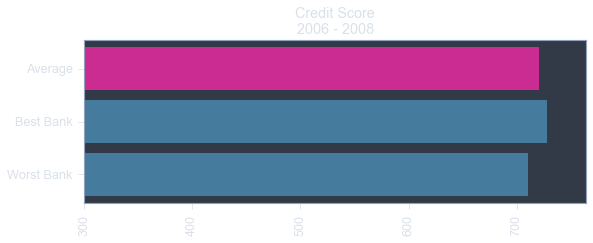

In [26]:
best_worst_gph('Credit Score', df = credit_score, l_xlim=300)

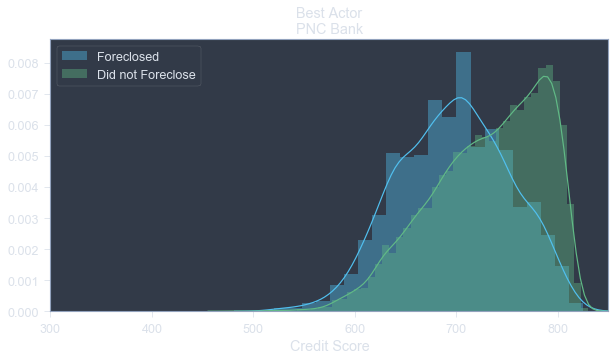

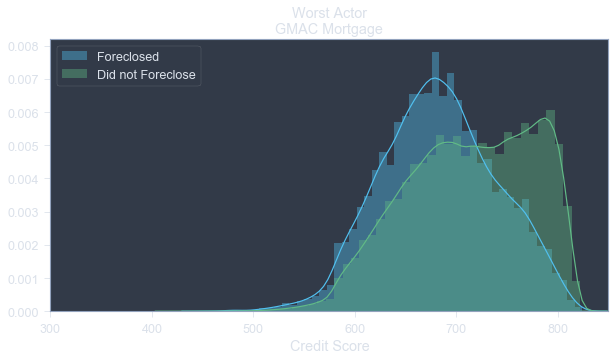

In [27]:
best_worst_density('Credit Score', df, credit_score, bins=None, l_xlim=300, r_xlim=850)

### Predictions

In [28]:
changed_assumptions_tbl('Credit Score', improved, weakened)

Foreclosures Credit Score         
                   (2006-2008)     Improved Weakened
Bank of America           11.6          1.9     17.3
Wells Fargo Bank           7.6          1.2     11.9
CitiMortgage               7.7            1     11.3
JPMorgan Chase             7.6          1.6     10.9
GMAC Mortgage              9.7            1     12.2
SunTrust Mortgage         10.3          1.6       13
AmTrust Bank               9.3          2.8     12.3
PNC Bank                   8.8          3.1     13.8
Flagstar Bank             11.7          2.1     15.8
All Banks                  9.7          1.6     14.1

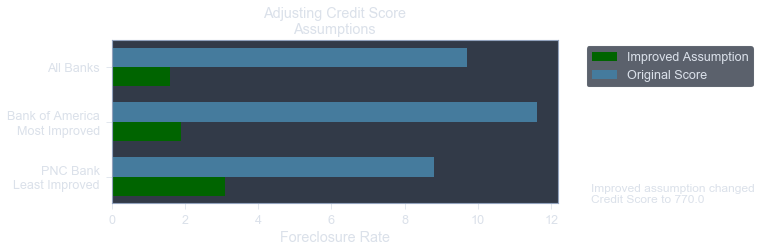

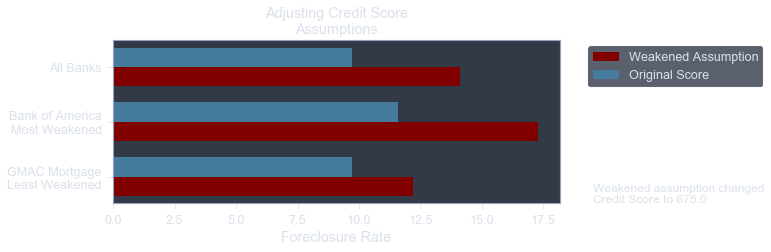

In [71]:
predicted_gph('Credit Score', proba = improved, proba_value = improved_values)

predicted_gph('Credit Score', proba = weakened, proba_value = weakened_values, 
              func = [min, max], improved=False)

***

# Debt to Income

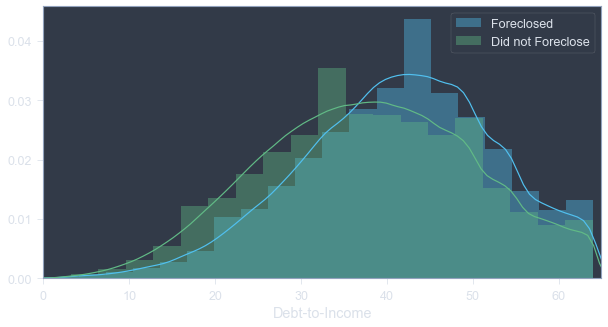

                   Debt-to-Income
Foreclosed                       
Did not Foreclose            37.8
Foreclosed                   41.4


In [30]:
feature_density('Debt-to-Income', bins=20, l_xlim=0, r_xlim=65)

,Debt-to-Income
All Banks,38.0
CitiMortgage,35.3
JPMorgan Chase,37.1
Bank of America,38.4
PNC Bank,38.5
SunTrust Mortgage,38.6
AmTrust Bank,38.7
Wells Fargo Bank,39.0
GMAC Mortgage,39.9
Flagstar Bank,40.9


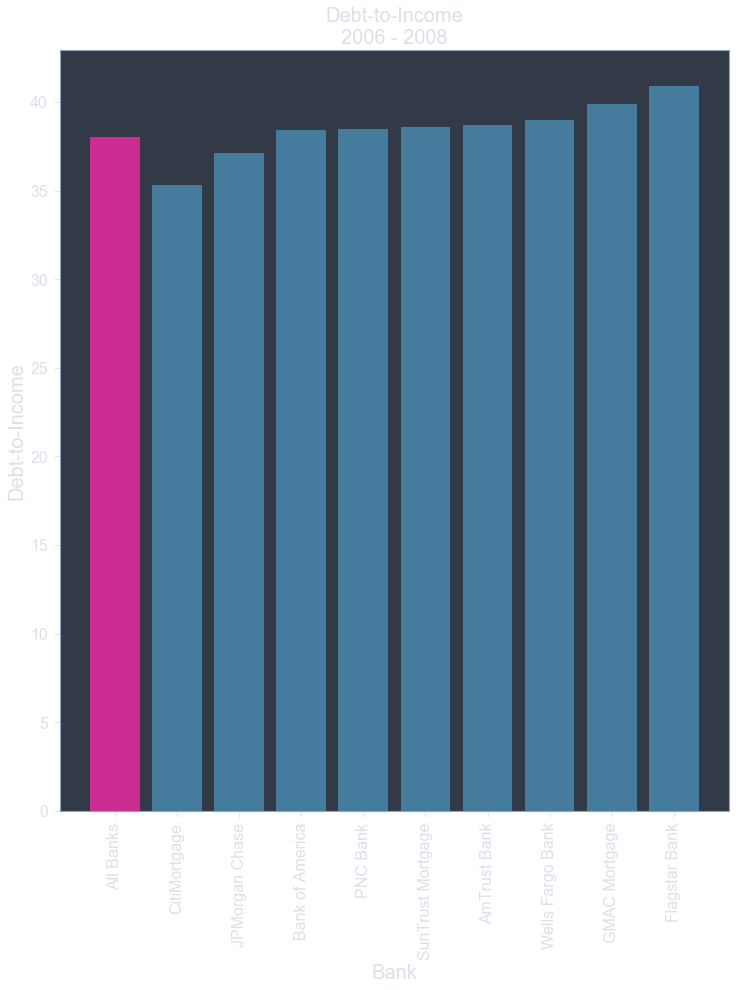

In [31]:
dti = Bank_Data(df = df, allvars = True)[['Debt-to-Income']]
bank_rank_gph('Debt-to-Income', df, dti)

,Bank,Debt-to-Income
Worst Bank,Flagstar Bank,40.9
Best Bank,CitiMortgage,35.3
Average,Overall,38.0


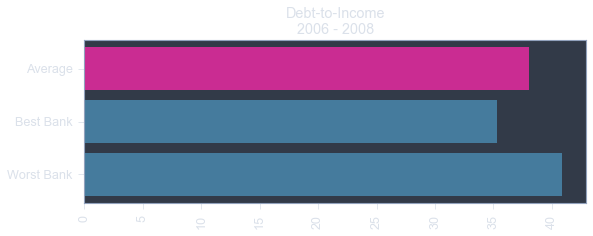

In [32]:
best_worst_gph('Debt-to-Income', df = dti, func = [min, max])

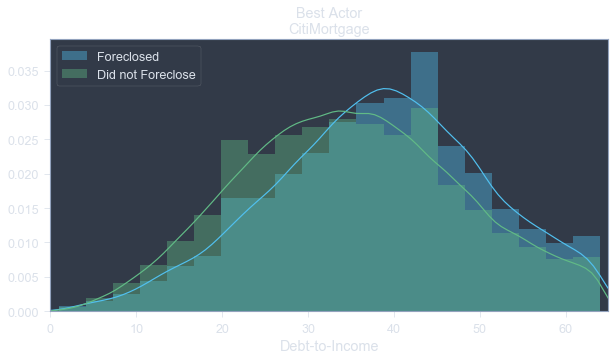

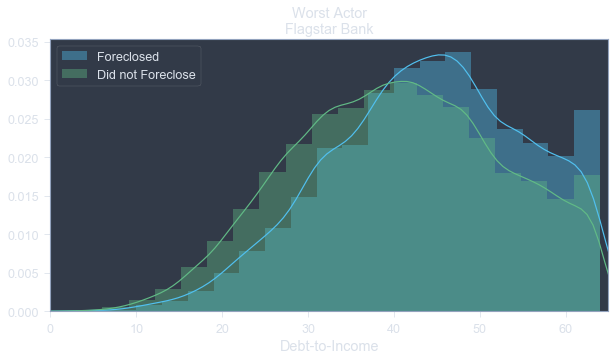

In [33]:
best_worst_density('Debt-to-Income', df, dti, func = [min, max], 
                   bins = 20, l_xlim=0, r_xlim=65)

### Predictions

In [34]:
changed_assumptions_tbl('Debt-to-Income', improved, weakened)

Foreclosures Debt-to-Income         
                   (2006-2008)       Improved Weakened
Bank of America           11.6            8.9     14.8
Wells Fargo Bank           7.6            3.5      9.4
CitiMortgage               7.7            5.4      9.7
JPMorgan Chase             7.6            5.5      8.9
GMAC Mortgage              9.7              5       11
SunTrust Mortgage         10.3            5.4      9.3
AmTrust Bank               9.3            5.5      9.9
PNC Bank                   8.8            5.2     12.5
Flagstar Bank             11.7            5.3     11.9
All Banks                  9.7            6.5     11.8

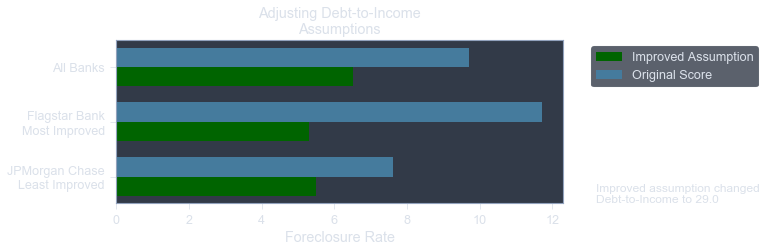

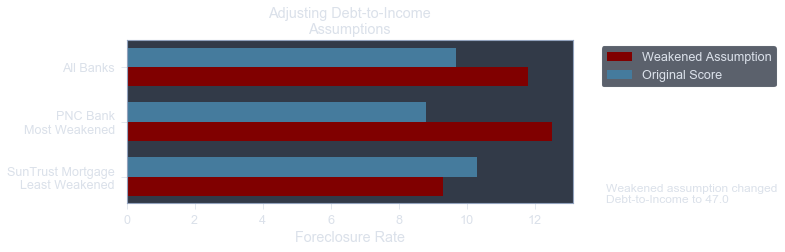

In [72]:
predicted_gph('Debt-to-Income', proba = improved, proba_value = improved_values)

predicted_gph('Debt-to-Income', proba = weakened, proba_value = weakened_values, 
              func = [min, max], improved=False)

***

# Combined Loan to Value

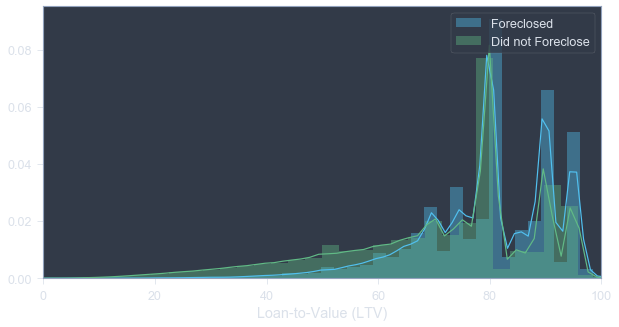

                   Loan-to-Value (LTV)
Foreclosed                            
Did not Foreclose                 71.3
Foreclosed                        79.5


In [37]:
feature_density('Loan-to-Value (LTV)', bins=None, l_xlim=0, r_xlim=100)

,Loan-to-Value (LTV)
All Banks,72.0
GMAC Mortgage,69.8
CitiMortgage,70.7
JPMorgan Chase,72.0
Bank of America,72.3
SunTrust Mortgage,72.6
Flagstar Bank,73.4
PNC Bank,73.9
Wells Fargo Bank,73.9
AmTrust Bank,74.6


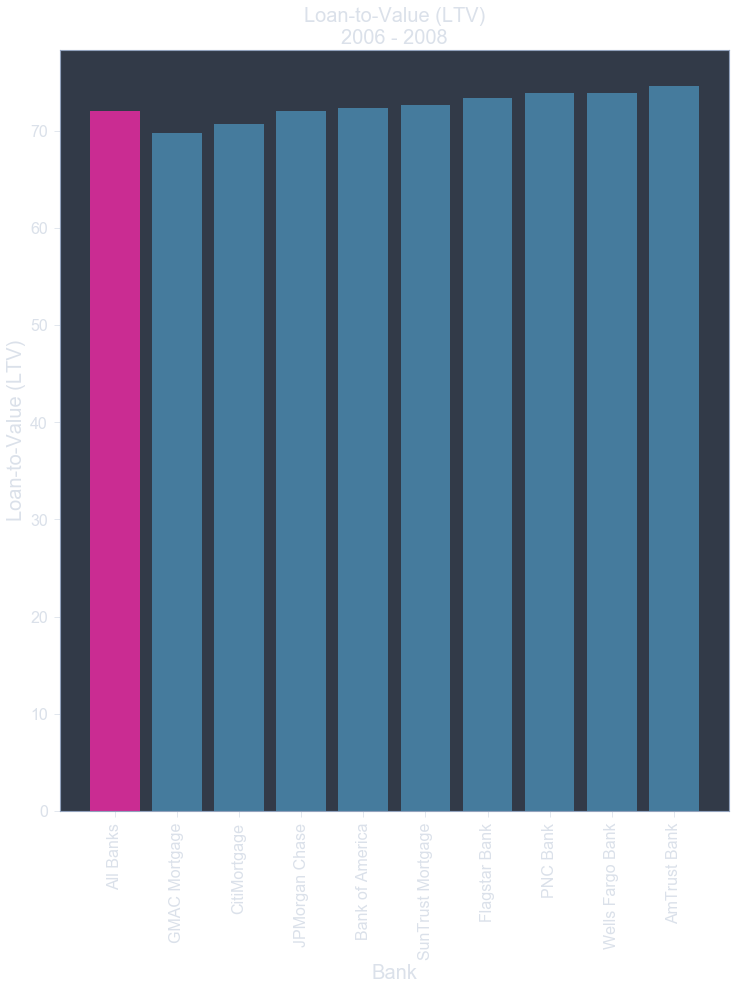

In [38]:
cltv = Bank_Data(df = df, allvars = True)[['Loan-to-Value (LTV)']]
bank_rank_gph('Loan-to-Value (LTV)', df, cltv)

,Bank,Loan-to-Value (LTV)
Worst Bank,AmTrust Bank,74.6
Best Bank,GMAC Mortgage,69.8
Average,Overall,72.0


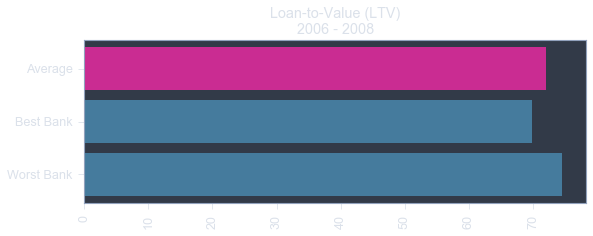

In [39]:
best_worst_gph('Loan-to-Value (LTV)', df = cltv, func = [min, max])

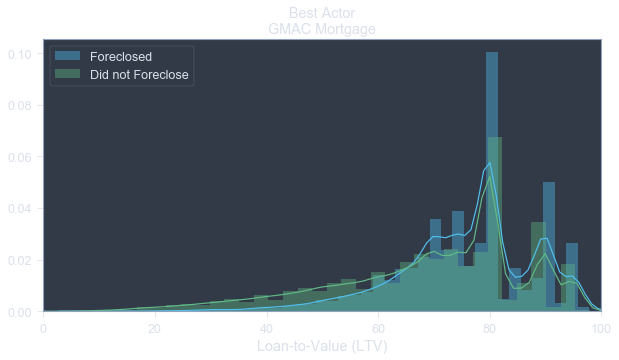

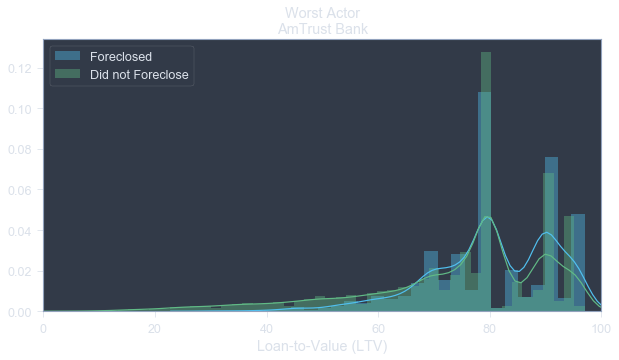

In [40]:
best_worst_density('Loan-to-Value (LTV)', df, cltv, func = [min, max], 
                   bins=None, l_xlim=0, r_xlim=100)

### Predictions

In [41]:
changed_assumptions_tbl('Loan-to-Value (LTV)', improved, weakened)

Foreclosures Loan-to-Value (LTV)         
                   (2006-2008)            Improved Weakened
Bank of America           11.6                 7.3     16.4
Wells Fargo Bank           7.6                 3.2      9.9
CitiMortgage               7.7                 3.8     10.8
JPMorgan Chase             7.6                 3.4      9.3
GMAC Mortgage              9.7                 5.4     14.4
SunTrust Mortgage         10.3                 3.4      9.8
AmTrust Bank               9.3                 4.3      9.8
PNC Bank                   8.8                   5     12.6
Flagstar Bank             11.7                 5.9     13.1
All Banks                  9.7                 5.3     13.2

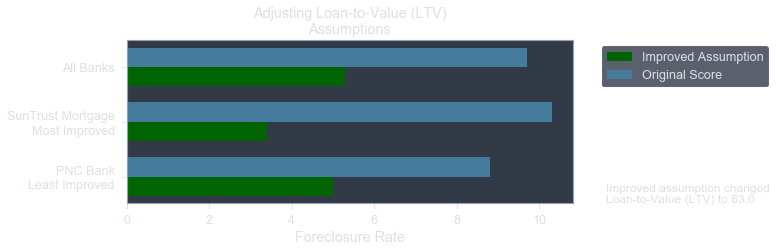

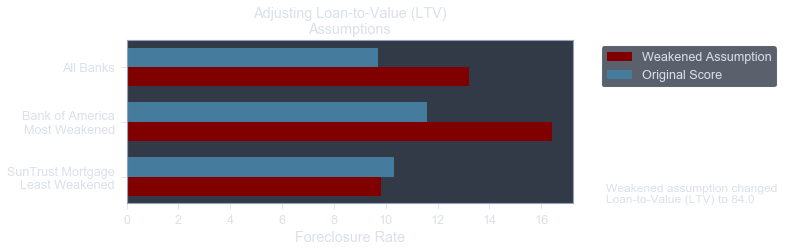

In [73]:
predicted_gph('Loan-to-Value (LTV)', proba = improved, proba_value = improved_values)

predicted_gph('Loan-to-Value (LTV)', proba = weakened, proba_value = weakened_values, 
              func = [min, max], improved=False)

***

# Median Household Income

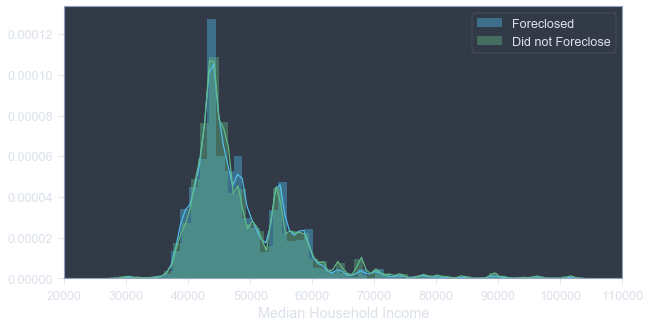

                   Median Household Income
Foreclosed                                
Did not Foreclose                 48797.97
Foreclosed                        48204.98


In [43]:
feature_density('Median Household Income', l_xlim=20000, r_xlim=110000)

,Median Household Income
All Banks,48740.00
SunTrust Mortgage,47263.55
AmTrust Bank,47708.53
Flagstar Bank,47920.06
PNC Bank,47951.92
JPMorgan Chase,48397.43
Bank of America,48567.87
Wells Fargo Bank,49196.66
GMAC Mortgage,49289.08
CitiMortgage,49490.66


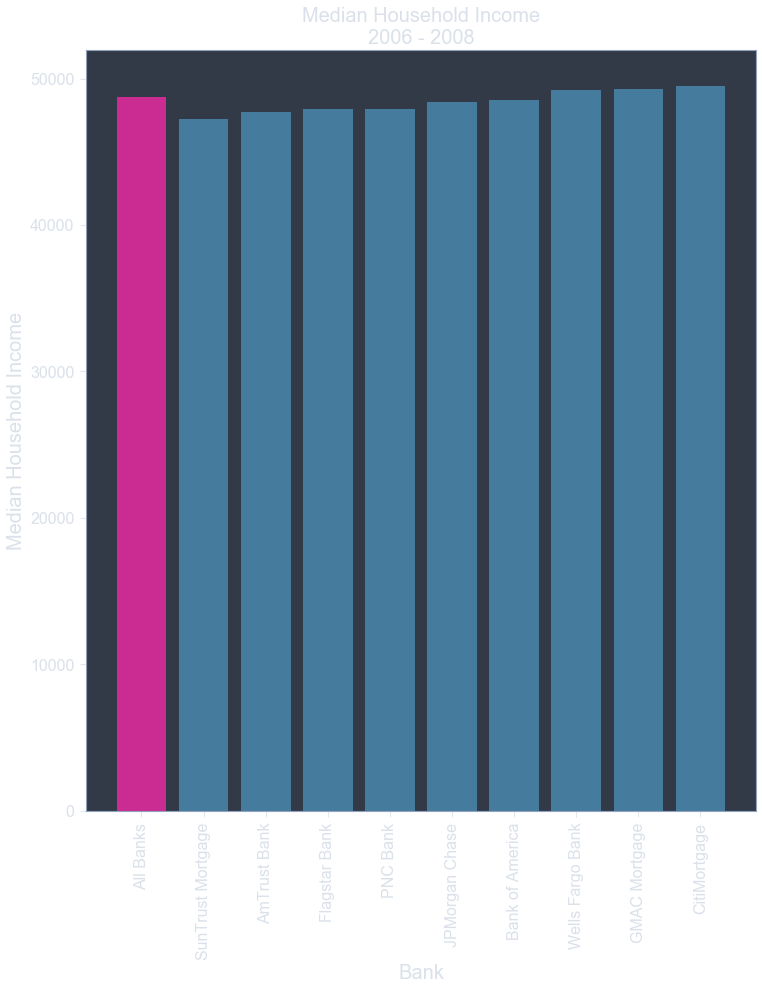

In [44]:
mhi = Bank_Data(df = df, allvars = True)[['Median Household Income']]
bank_rank_gph('Median Household Income', df, mhi)

,Bank,Median Household Income
Worst Bank,SunTrust Mortgage,47263.55
Best Bank,CitiMortgage,49490.66
Average,Overall,48420.00


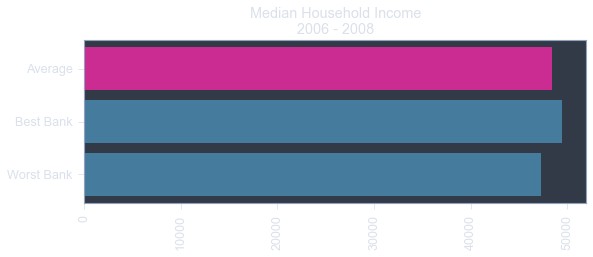

In [45]:
best_worst_gph('Median Household Income', df = mhi)

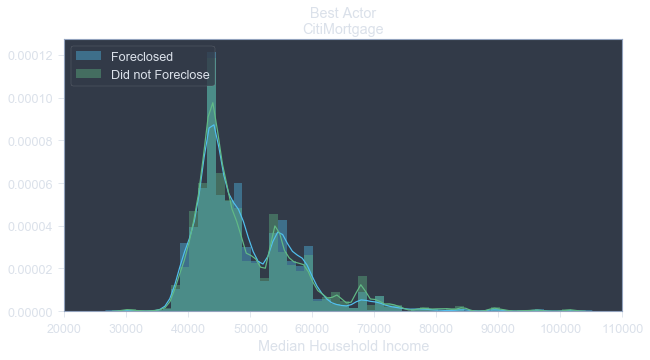

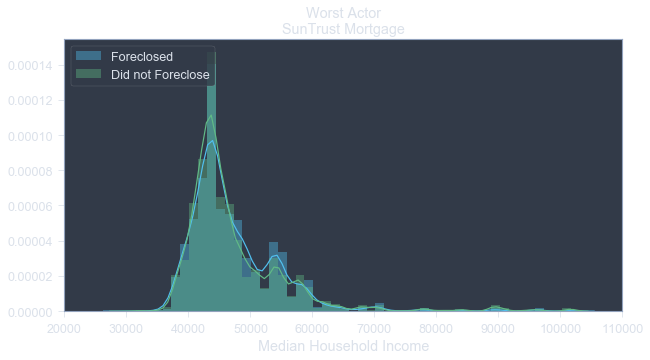

In [46]:
best_worst_density('Median Household Income', df, mhi, l_xlim=20000, r_xlim=110000)

### Predictions

In [47]:
changed_assumptions_tbl('Median Household Income', improved, weakened)

Foreclosures Median Household Income         
                   (2006-2008)                Improved Weakened
Bank of America           11.6                    14.4     13.3
Wells Fargo Bank           7.6                     8.4      8.7
CitiMortgage               7.7                     8.9      7.7
JPMorgan Chase             7.6                     8.2      7.4
GMAC Mortgage              9.7                    10.3      9.2
SunTrust Mortgage         10.3                     8.9      8.1
AmTrust Bank               9.3                     8.7     10.2
PNC Bank                   8.8                    11.3      9.9
Flagstar Bank             11.7                    11.5     10.4
All Banks                  9.7                    11.2     10.4

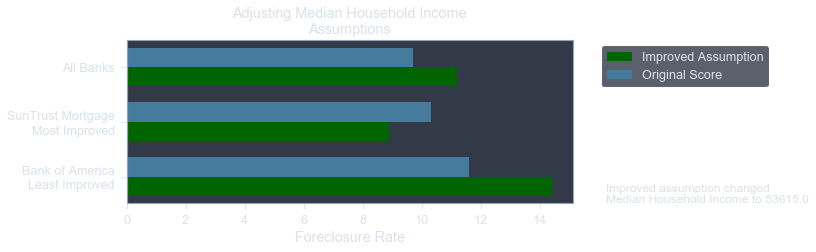

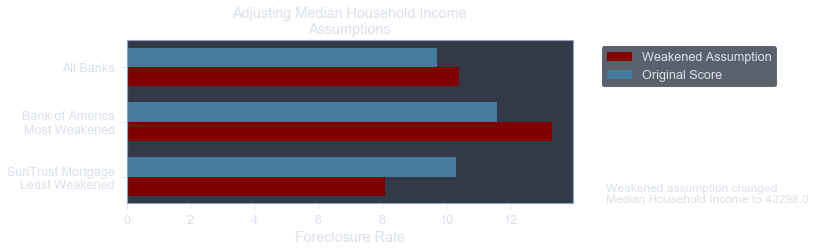

In [74]:
predicted_gph('Median Household Income', 
              proba = improved, proba_value = improved_values)

predicted_gph('Median Household Income', func = [min, max], 
              proba = weakened, proba_value = weakened_values, improved=False)

Best and worst assumptions illustration

In [49]:
changed_assumptions_tbl('Median Household Income', best, worst)

Foreclosures Median Household Income         
                   (2006-2008)                Improved Weakened
Bank of America           11.6                     6.5     12.9
Wells Fargo Bank           7.6                     4.7      7.4
CitiMortgage               7.7                     3.5      6.7
JPMorgan Chase             7.6                     3.4      7.3
GMAC Mortgage              9.7                     3.2     10.5
SunTrust Mortgage         10.3                     4.3      8.6
AmTrust Bank               9.3                     3.2      4.4
PNC Bank                   8.8                     3.3     10.2
Flagstar Bank             11.7                     5.1     10.7
All Banks                  9.7                     4.9      9.9

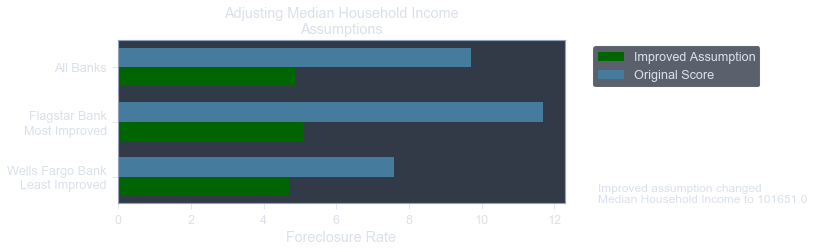

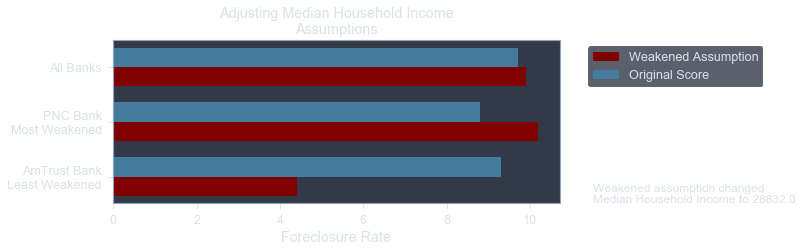

In [76]:
predicted_gph('Median Household Income', 
              proba = best, proba_value = best_values)

predicted_gph('Median Household Income', func = [min, max], 
              proba = worst, proba_value = worst_values, improved=False)

***

# Loan Change

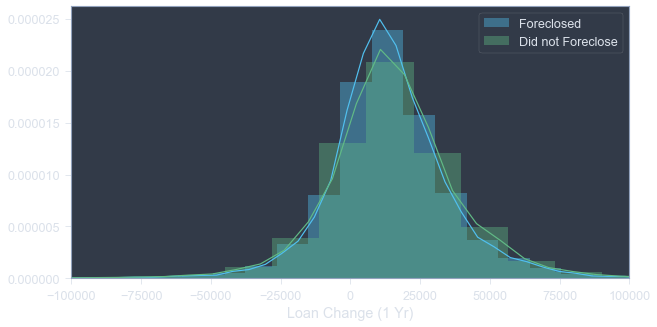

                   Loan Change (1 Yr)
Foreclosed                           
Did not Foreclose            15410.44
Foreclosed                   13930.16


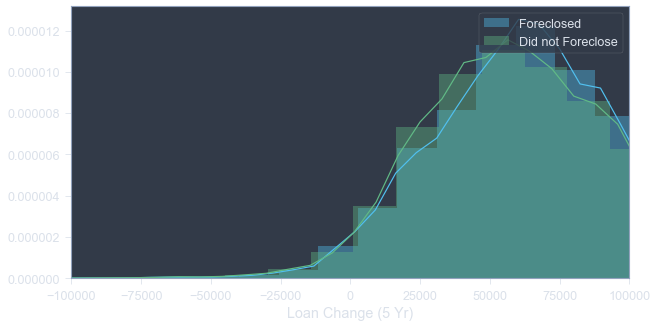

                   Loan Change (5 Yr)
Foreclosed                           
Did not Foreclose            61932.22
Foreclosed                   63530.67


In [51]:
for v in ['Loan Change (1 Yr)', 'Loan Change (5 Yr)']:
    feature_density(v, l_xlim=-100000, r_xlim=100000)

,Loan Change (1 Yr)
All Banks,15266.00
PNC Bank,5880.24
AmTrust Bank,7234.06
Flagstar Bank,11761.54
Bank of America,12967.53
SunTrust Mortgage,13497.83
CitiMortgage,17006.76
GMAC Mortgage,17232.85
Wells Fargo Bank,18325.46
JPMorgan Chase,19296.47


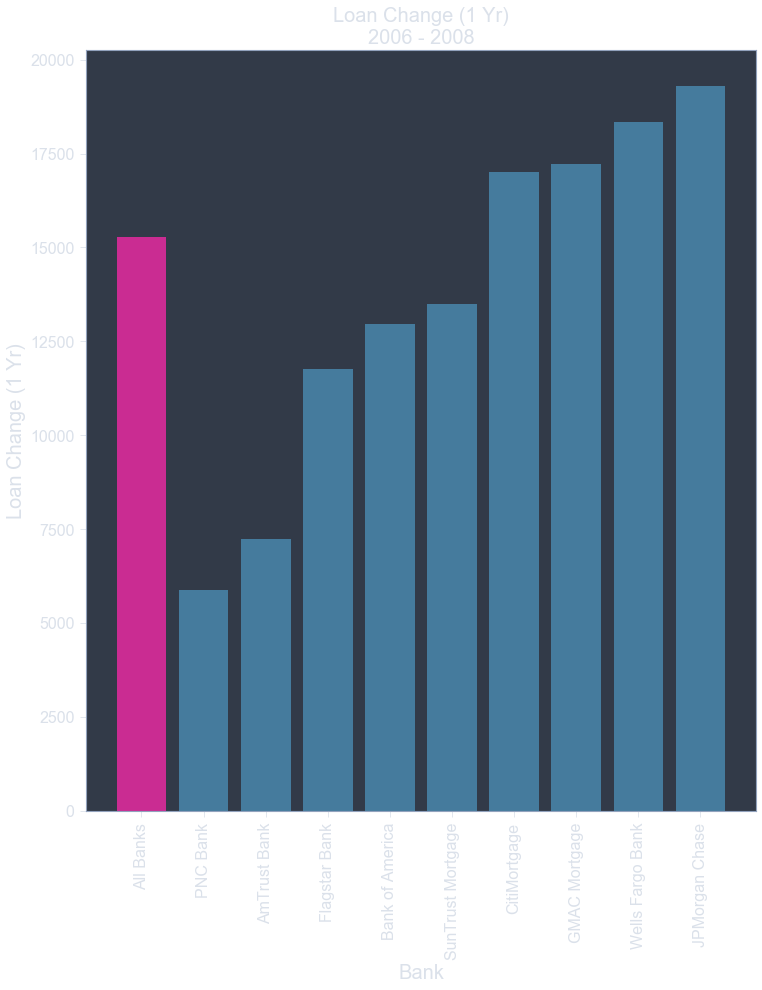

,Loan Change (5 Yr)
All Banks,62087.00
AmTrust Bank,34663.51
Flagstar Bank,39533.37
PNC Bank,50746.67
SunTrust Mortgage,50797.33
Bank of America,52684.29
JPMorgan Chase,63666.73
GMAC Mortgage,65352.23
CitiMortgage,67493.36
Wells Fargo Bank,96423.40


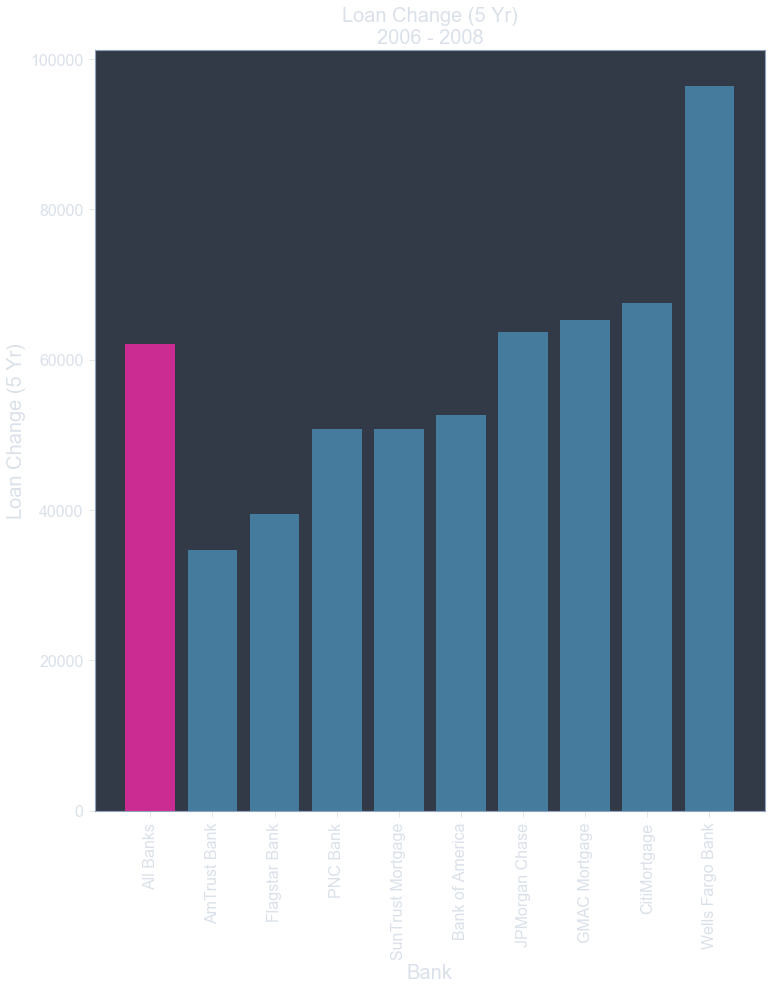

In [52]:
lc1 = Bank_Data(df = df, allvars = True)[['Loan Change (1 Yr)']]
bank_rank_gph('Loan Change (1 Yr)', df, lc1)

lc5 = Bank_Data(df = df, allvars = True)[['Loan Change (5 Yr)']]
bank_rank_gph('Loan Change (5 Yr)', df, lc5)

,Bank,Loan Change (1 Yr)
Worst Bank,JPMorgan Chase,19296.47
Best Bank,PNC Bank,5880.24
Average,Overall,13689.00


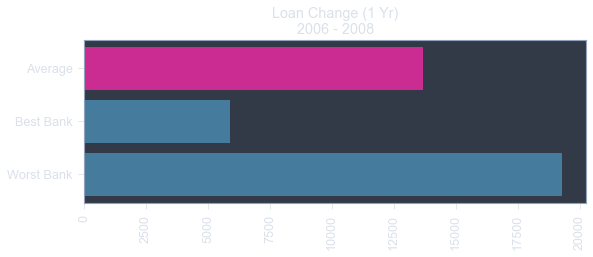

,Bank,Loan Change (5 Yr)
Worst Bank,Wells Fargo Bank,96423.40
Best Bank,AmTrust Bank,34663.51
Average,Overall,57928.00


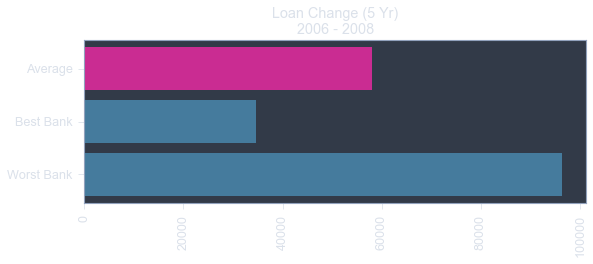

In [53]:
best_worst_gph('Loan Change (1 Yr)', df = lc1, func = [min, max])

best_worst_gph('Loan Change (5 Yr)', df = lc5, func = [min, max])

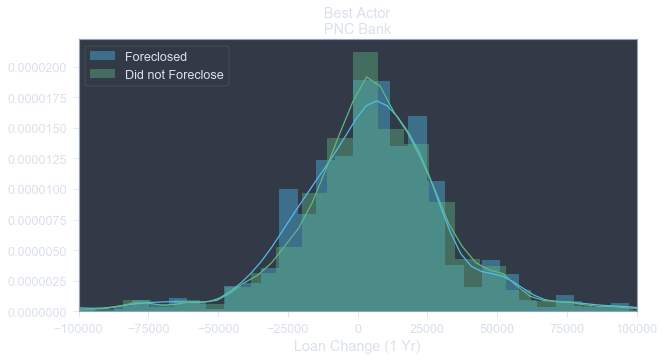

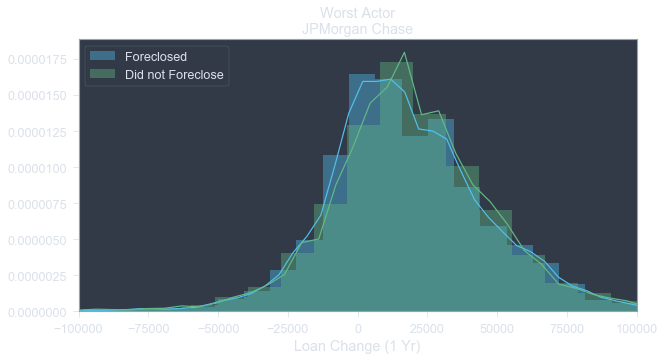

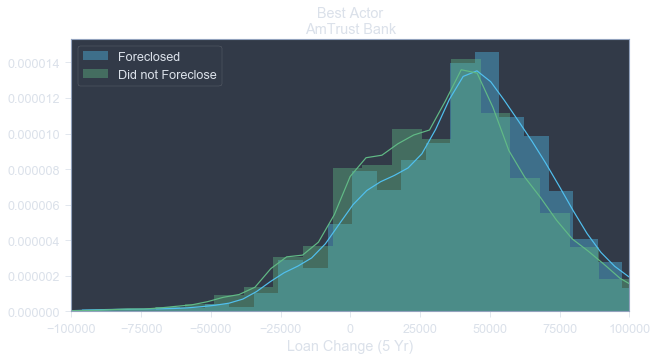

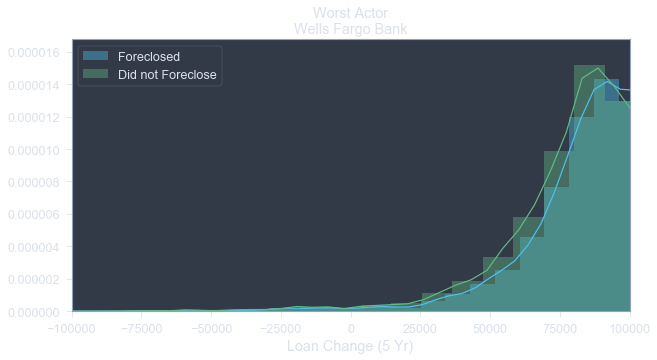

In [54]:
best_worst_density('Loan Change (1 Yr)', df, lc1, func = [min, max], 
                           l_xlim=-100000, r_xlim=100000)

best_worst_density('Loan Change (5 Yr)', df, lc5, func = [min, max], 
                           l_xlim=-100000, r_xlim=100000)

### Predictions

In [55]:
changed_assumptions_tbl('Loan Change (1 Yr)', improved, weakened)

Foreclosures Loan Change (1 Yr)         
                   (2006-2008)           Improved Weakened
Bank of America           11.6               11.1       17
Wells Fargo Bank           7.6                3.6      6.4
CitiMortgage               7.7                5.4     10.7
JPMorgan Chase             7.6                4.2       11
GMAC Mortgage              9.7                  7     11.4
SunTrust Mortgage         10.3                6.7     10.1
AmTrust Bank               9.3                9.9     13.6
PNC Bank                   8.8                8.7     13.6
Flagstar Bank             11.7               13.6     13.8
All Banks                  9.7                7.9     12.9

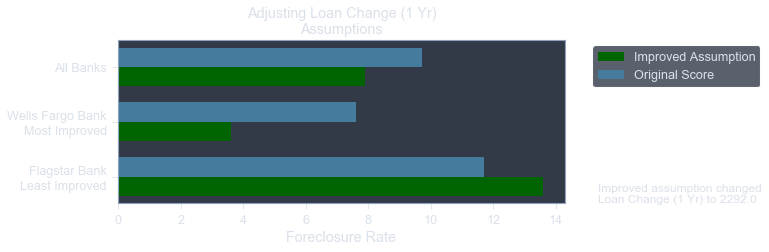

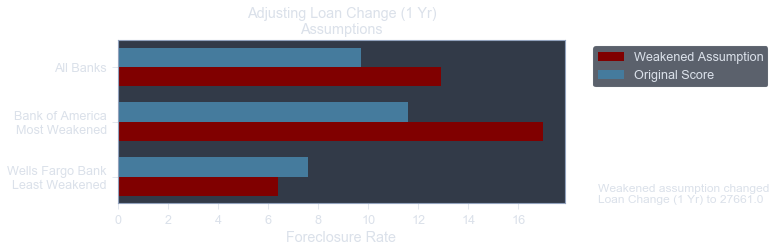

In [77]:
predicted_gph('Loan Change (1 Yr)', 
              proba = improved, proba_value = improved_values)

predicted_gph('Loan Change (1 Yr)', func = [min, max],
              proba = weakened, proba_value = weakened_values, improved=False)

In [57]:
lc_tbl = changed_assumptions_tbl('Loan Change (5 Yr)', improved, weakened)
lc_tbl.columns = [['Foreclosures', 'Loan Change', 'Loan Change'],
              ['(2006-2008)', 'Improved', 'Weakened']]
lc_tbl

Foreclosures Loan Change         
                   (2006-2008)    Improved Weakened
Bank of America           11.6        11.1       17
Wells Fargo Bank           7.6         3.6      6.4
CitiMortgage               7.7         5.4     10.7
JPMorgan Chase             7.6         4.2       11
GMAC Mortgage              9.7           7     11.4
SunTrust Mortgage         10.3         6.7     10.1
AmTrust Bank               9.3         9.9     13.6
PNC Bank                   8.8         8.7     13.6
Flagstar Bank             11.7        13.6     13.8
All Banks                  9.7         7.9     12.9

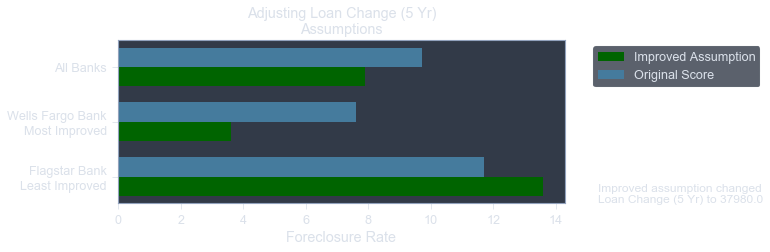

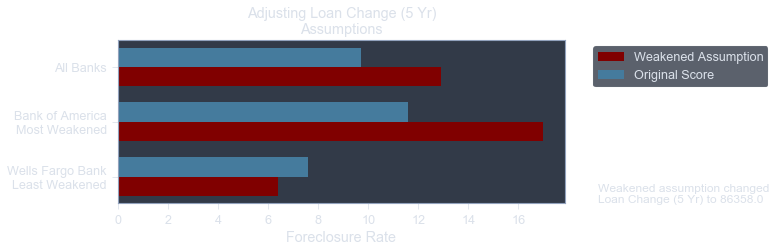

In [92]:
# Update assumption order
improved_values['Loan Change (5 Yr)'] = [improved_values['Loan Change (1 Yr)'][1]]
weakened_values['Loan Change (5 Yr)'] = [weakened_values['Loan Change (1 Yr)'][1]]

predicted_gph('Loan Change (5 Yr)', 
              proba = improved, proba_value = improved_values)

predicted_gph('Loan Change (5 Yr)', func = [min, max],
              proba = weakened, proba_value = weakened_values, improved=False)

***